In [1]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special
from def_crs import*
from model_fct import*
from g_funct import*
from FBT import FBT 
from model_fct import*
from def_conv_crs_1h import*
from def_conv_crs_2h import*

import pandas as pd
import sys 


/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm


In [2]:
dati_lp1=pd.read_csv('fit_parameters/partials_dfs/dati_lp_su_charm_no_no_scale_10.58_def.csv')
dati_lk1=pd.read_csv('fit_parameters/partials_dfs/dati_lk_su_charm_no_no_scale_10.58_def.csv')
#
dati_lp2=pd.read_csv('fit_parameters/partials_dfs/dati_lp_su_charm_no_yes_scale_10.58_def.csv')
dati_lk2=pd.read_csv('fit_parameters/partials_dfs/dati_lk_su_charm_no_yes_scale_10.58_def.csv')
#
dati_lp3=pd.read_csv('fit_parameters/partials_dfs/dati_lp_su_charm_yes_yes_scale_10.58_def.csv')
dati_lk3=pd.read_csv('fit_parameters/partials_dfs/dati_lk_su_charm_yes_yes_scale_10.58_def.csv')
#
dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')


In [3]:
y_lbl=50
x_lbl =50

ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti
title_s=35 #dimensione titolo bin
fit_l=2.  # dimensione linea fit

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


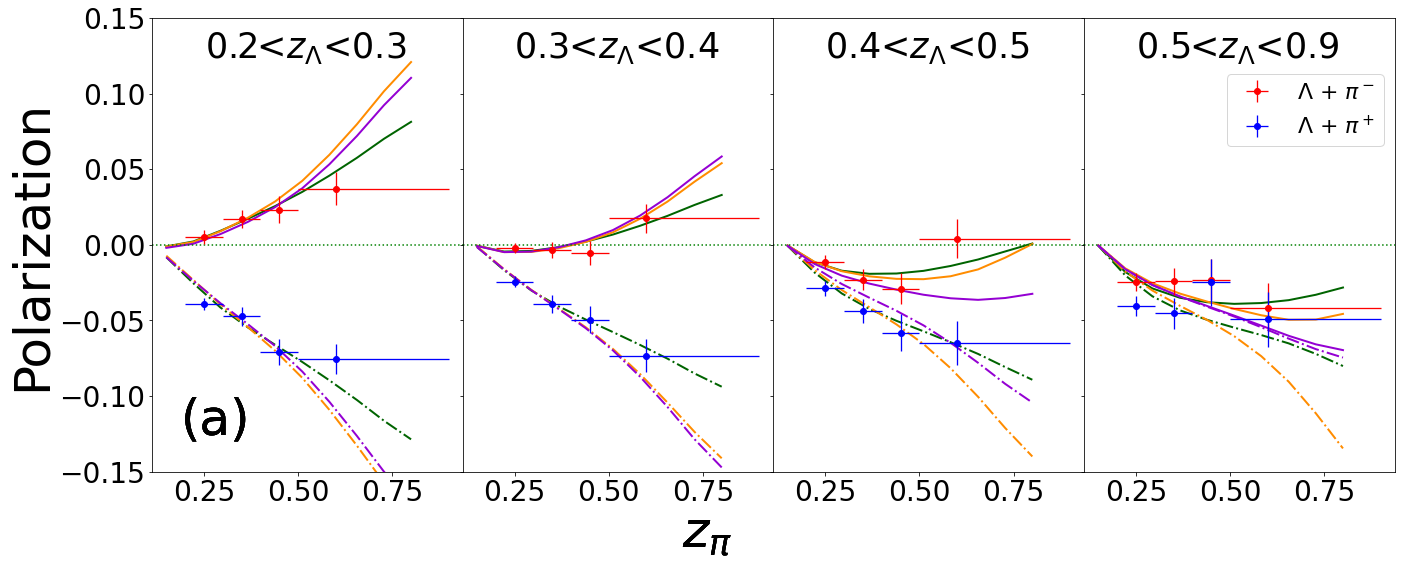

In [4]:
ct=1

fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='_(1)',linewidth=fit_l,color='darkgreen')
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
    #ax.fill_between(dt12.z2,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=1)
    #ax.fill_between(dt1.z2,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=1)

    
    ax.plot(dt12.z2,dt22.conv,label='_(2)',linewidth=fit_l,color='darkorange')
    ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
    #ax.fill_between(dt12.z2,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=1)
    #ax.fill_between(dt1.z2,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=1)

    ax.plot(dt12.z2,dt32.conv,label='_(3)',linewidth=fit_l,color='darkviolet')
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
    #ax.fill_between(dt12.z2,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="-",edgecolor="darkviolet", alpha=1)
    #ax.fill_between(dt1.z2,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="-",edgecolor="darkviolet", alpha=1)

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
#fig.savefig('plot_draft/Lb_pi.png')

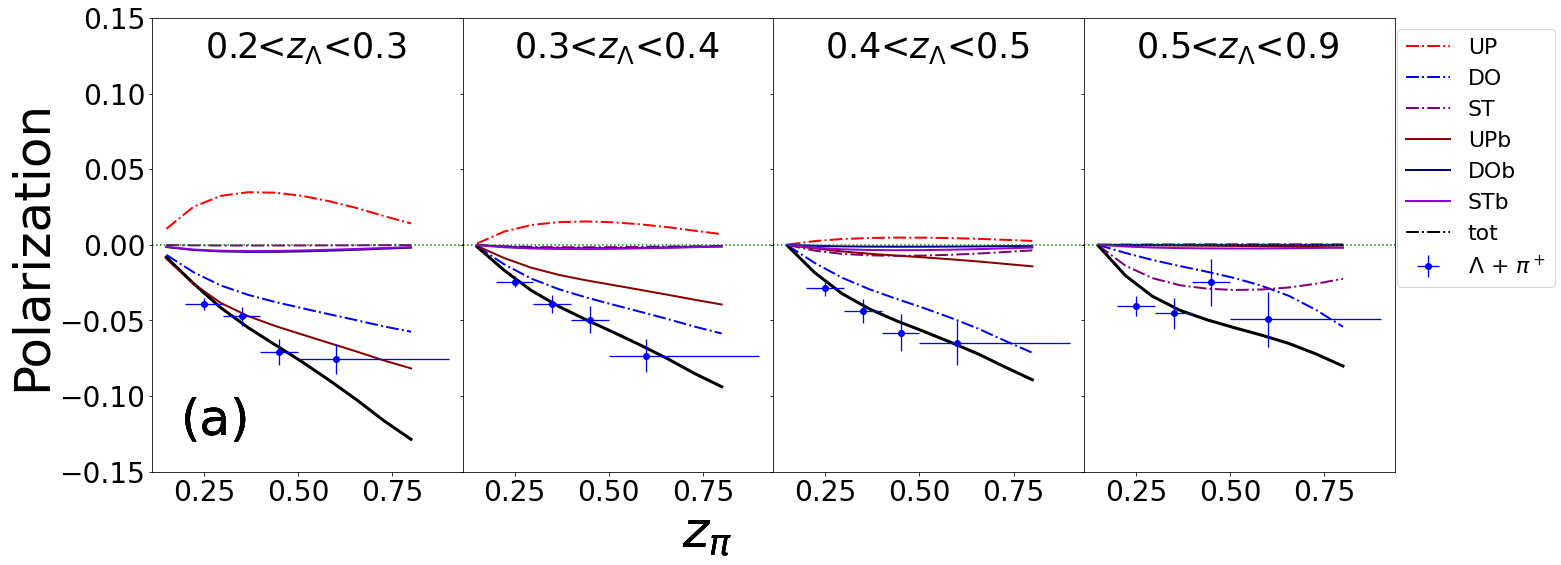

In [8]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 1
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt1.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt1.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt1.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt1.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt1.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt1.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')
    tot=dt1.UP+dt1.DO+dt1.ST+dt1.UPb+dt1.DOb+dt1.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='-.',color='black')

    
    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen1.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen1.pdf',bbox_inches='tight')

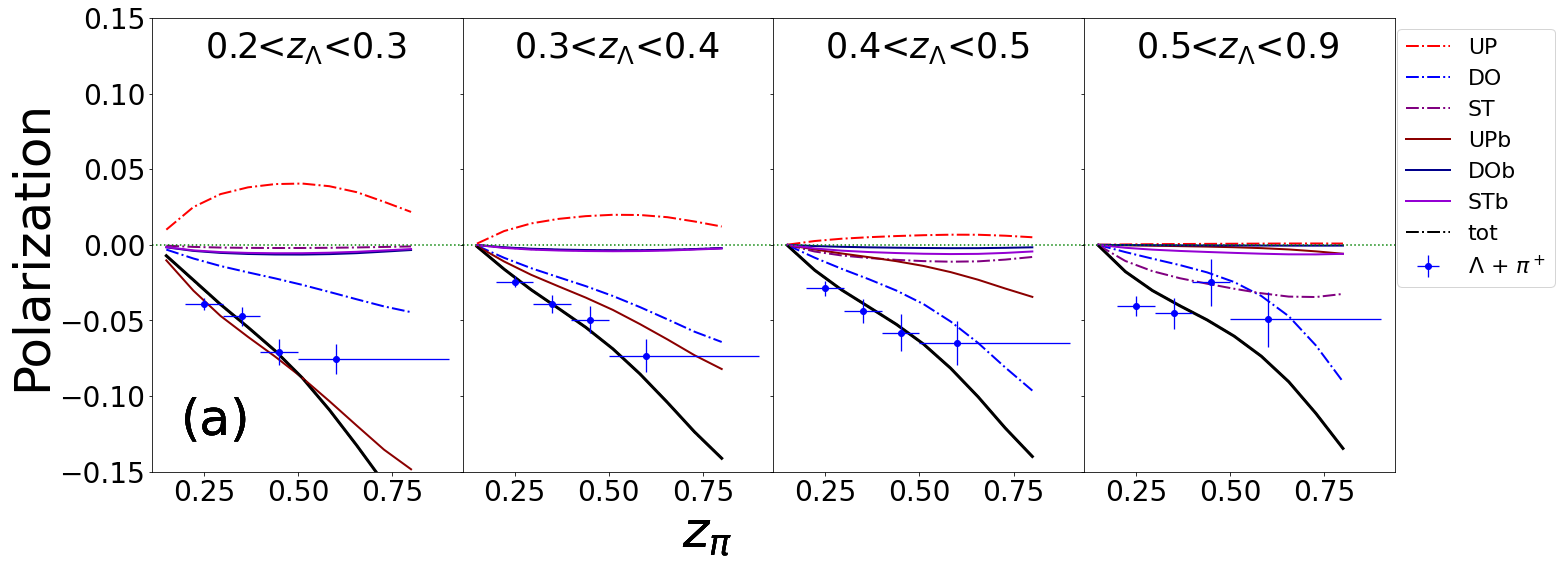

In [13]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 2
    ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt2.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt2.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt2.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt2.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt2.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt2.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')

    tot=dt2.UP+dt2.DO+dt2.ST+dt2.UPb+dt2.DOb+dt2.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='-.',color='black')

    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen2.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen2.pdf',bbox_inches='tight')

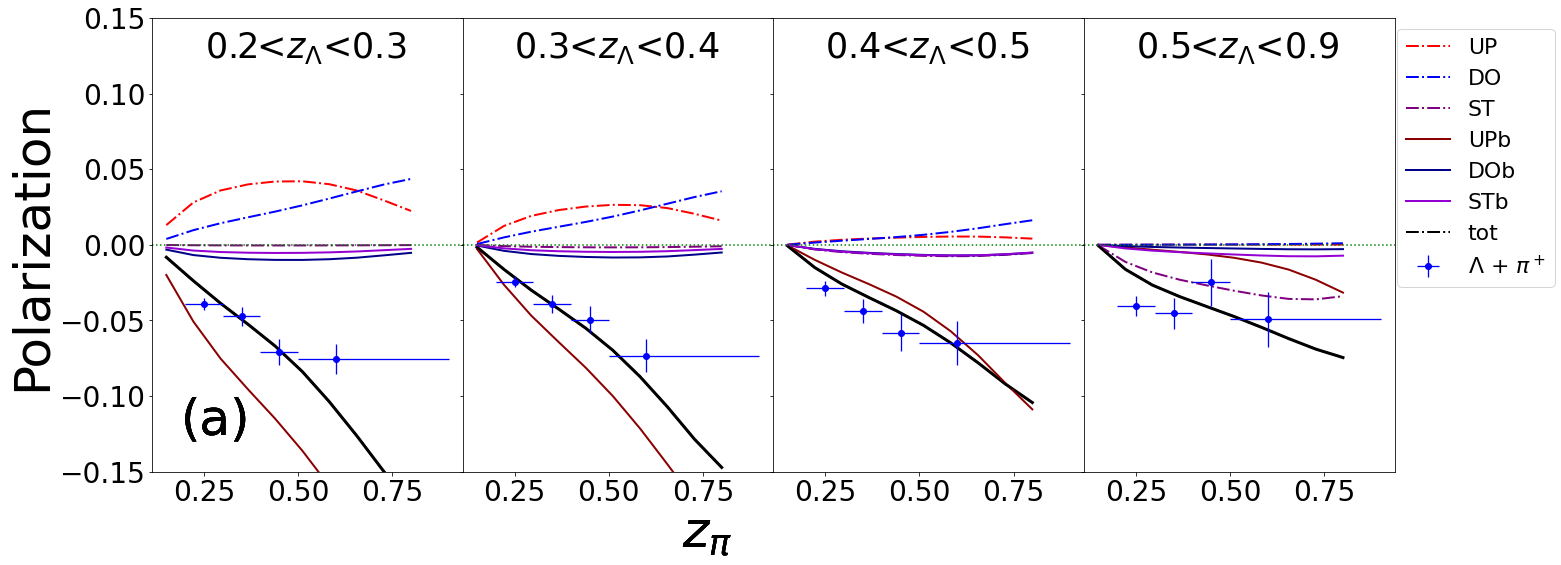

In [12]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 3
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt3.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt3.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt3.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt3.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt3.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt3.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')
    tot=dt3.UP+dt3.DO+dt3.ST+dt3.UPb+dt3.DOb+dt3.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='-.',color='black')

    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen3.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_pi_scen3.pdf',bbox_inches='tight')

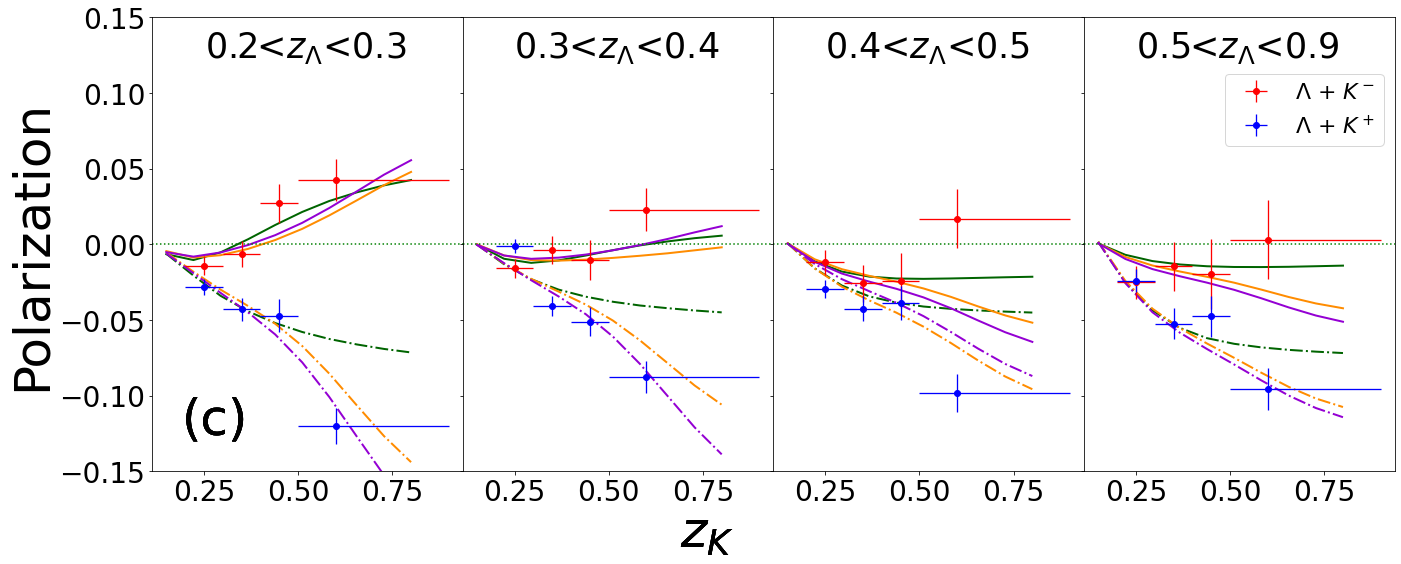

In [17]:
ct=1
z1=[0.25,.35,.45,.6]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)
    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='_(1)',linewidth=fit_l,color='darkgreen')
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
    #ax.fill_between(dt12.z2,dt12.maxx,dt12.mins,label='_(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=1)
    #ax.fill_between(dt1.z2,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=1)

    
    ax.plot(dt12.z2,dt22.conv,label='_(2)',linewidth=fit_l,color='darkorange')
    ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
    #ax.fill_between(dt12.z2,dt22.maxx,dt22.mins,label='_(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=1)
    #ax.fill_between(dt1.z2,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=1)

    ax.plot(dt12.z2,dt32.conv,label='_(3)',linewidth=fit_l,color='darkviolet')
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
    #ax.fill_between(dt12.z2,dt32.maxx,dt32.mins,label='_(3)',linewidth=fit_l,color="none",hatch="-",edgecolor="darkviolet", alpha=1)
    #ax.fill_between(dt1.z2,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="-",edgecolor="darkviolet", alpha=1)

    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_k.pdf')
#fig.savefig('plot_draft/Lb_k.png')
#fig.savefig('Lb_k_new.png')

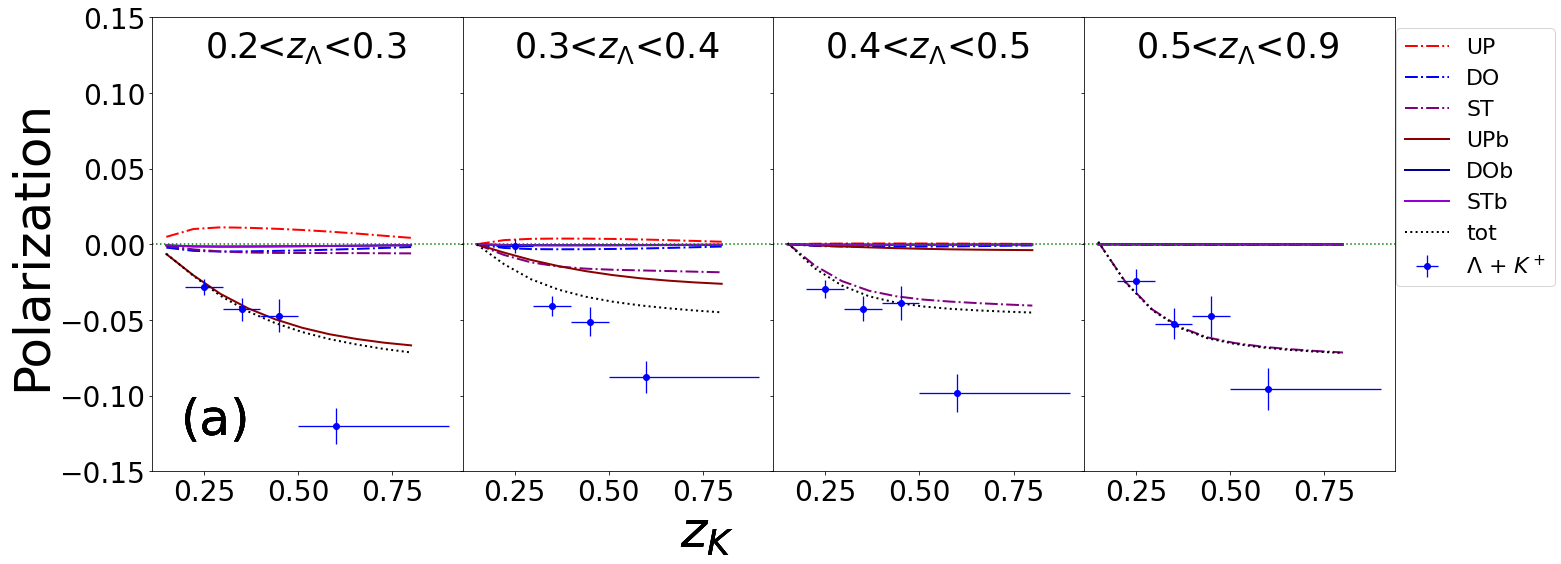

In [23]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 1
    #ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt1.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt1.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt1.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt1.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt1.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt1.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')
    tot=dt1.UP+dt1.DO+dt1.ST+dt1.UPb+dt1.DOb+dt1.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='dotted',color='black')

    
    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen1.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen1.pdf',bbox_inches='tight')

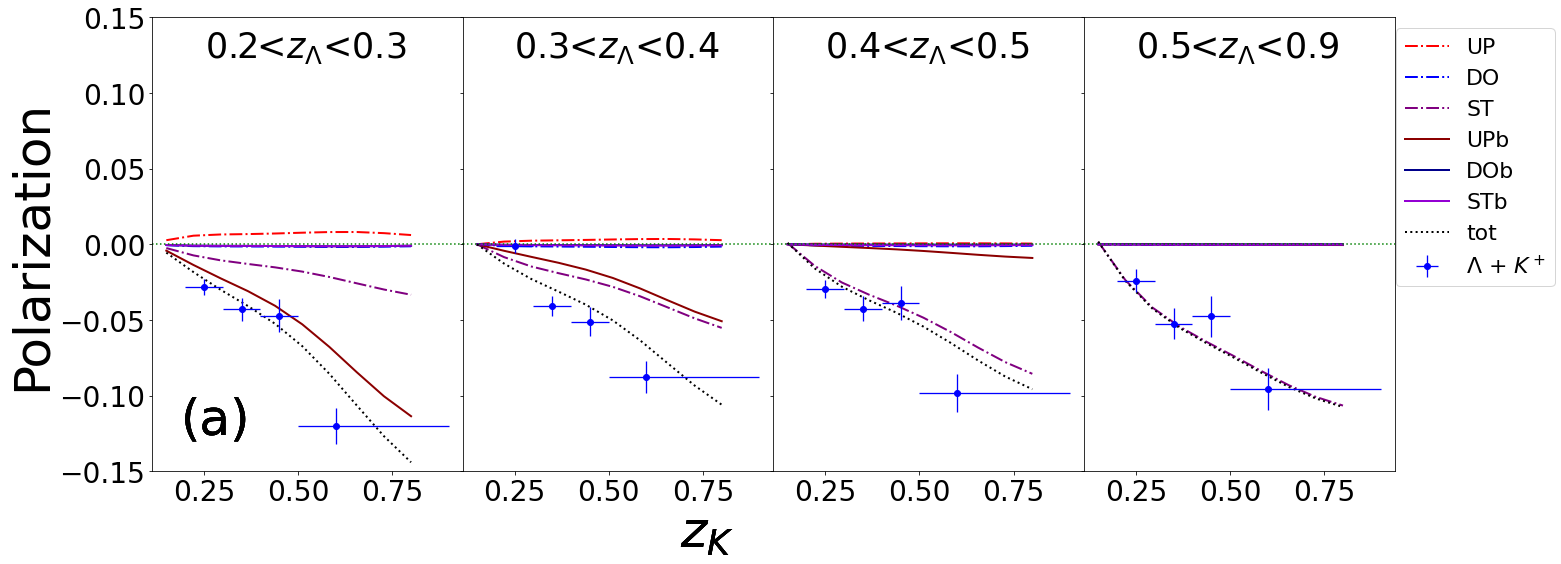

In [22]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 1
    #ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt2.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt2.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt2.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt2.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt2.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt2.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')
    tot=dt2.UP+dt2.DO+dt2.ST+dt2.UPb+dt2.DOb+dt2.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='dotted',color='black')

    
    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen2.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen2.pdf',bbox_inches='tight')

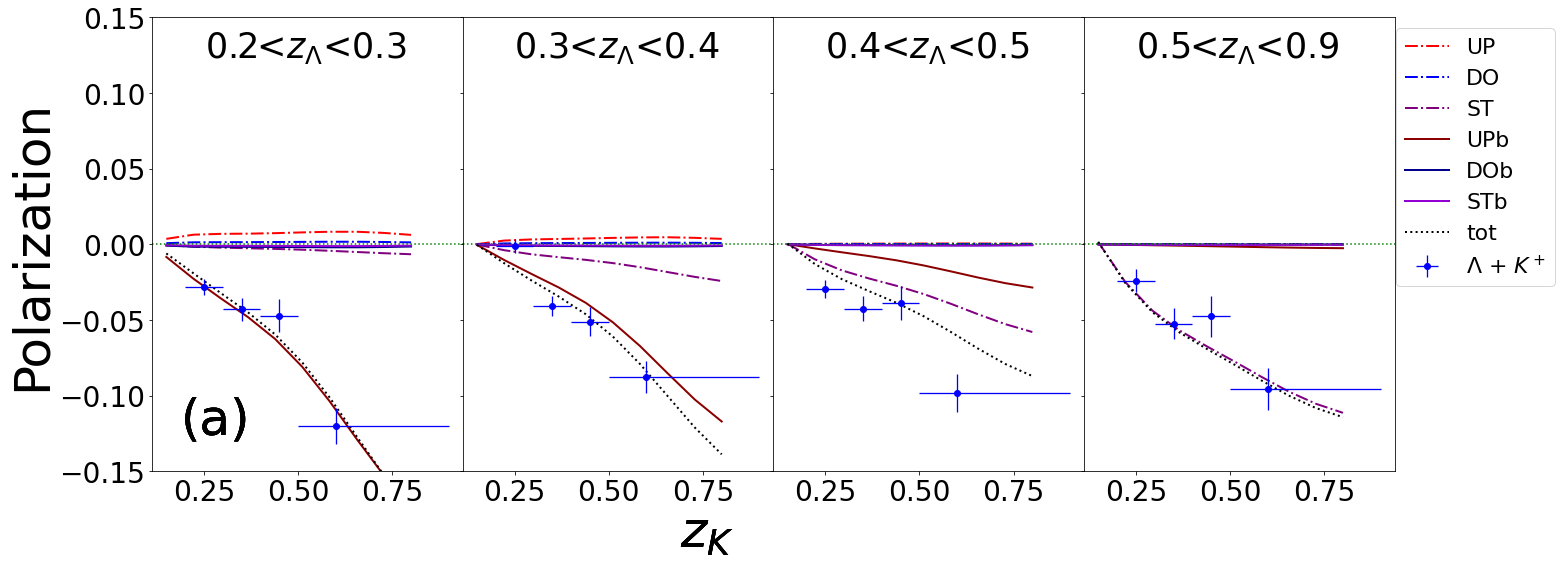

In [21]:
ct=1
lim=[-0.15,0.15]
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ### scen 1
    #ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l+1,linestyle='solid',color='black')
    ax.plot(dt1.z2,dt3.UP,label='UP',linewidth=fit_l,linestyle='-.',color='red')
    ax.plot(dt1.z2,dt3.DO,label='DO',linewidth=fit_l,linestyle='-.',color='blue')
    ax.plot(dt1.z2,dt3.ST,label='ST',linewidth=fit_l,linestyle='-.',color='purple')
    ax.plot(dt1.z2,dt3.UPb,label='UPb',linewidth=fit_l,linestyle='-',color='darkred')
    ax.plot(dt1.z2,dt3.DOb,label='DOb',linewidth=fit_l,linestyle='-',color='darkblue')
    ax.plot(dt1.z2,dt3.STb,label='STb',linewidth=fit_l,linestyle='-',color='darkviolet')
    tot=dt3.UP+dt3.DO+dt3.ST+dt3.UPb+dt3.DOb+dt3.STb
    ax.plot(dt1.z2,tot,label='tot',linewidth=fit_l,linestyle='dotted',color='black')

    
    ### scen 2
    #ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')

    
    ### scen 3
    #ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    #ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.55,1.), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen3.png',bbox_inches='tight')
fig.savefig('fit_parameters/partials_dfs/Lb_k_scen3.pdf',bbox_inches='tight')